# Investment in Manchester's Suburbs

<p style="font-size:14pt; font-weight: bold;">1. Introduction</p>
<p>The northern city of Manchester is established as the single biggest tech hub outside of London, boasting a cumulative digital turnover of around £2.9 billion and offering an impressive 62,653 digital jobs. Those jobs attract young professionals with high expendable income from all over the world. Certain suburbs of Manchester have seen substantial hikes in house pricing in recent years. I believe those more affluent areas with the most expensive residential property and the highest yield for investors have large numbers of cafes, bars, restaurants etc, so draw younger residents who rent property while working in Manchester.</p>

<p>In this project, I will use the Foursquare API to explore suburbs of Manchester, and classify them based on popular venues. I will look at how much property costs thus how affluent each suburb is. I will also look at the average yield in each postcode and assess whether it is related to the popular venues.</p>

The data in this project will be useful to…
* Young professionals looking to rent in Manchester, unsure of which suburb would be most suitable. Young professionals prefer suburbs with low 'per room'rent, but lots of nearby venues that will enhance their social lives, such as bars, nightclubs and cafes. They also need to be able to commute easily into work, often in the city centre.
* Councils and town planners looking to invest in Manchester suburbs to attract young professionals with high expendable income. Young professionals have no dependables, so more disposable income which they spend on socialising. It is therefore beneficial for local businesses to have lots of young professionals living nearby.
* Investors deciding where to invest in residential properties for the highest ROI. Investors look for areas with the highest potential yield.

<p style="font-size:14pt; font-weight: bold;">2. Data</p>

In this notebook, I am going to explore suburbs of Manchester to see if there is a relationship between average house price and the category of nearby venues.

- I will scrape the Manchester postcodes from the following Wikipedia page: https://en.wikipedia.org/wiki/M_postcode_area
- I have retrieved average house prices for each Manchester postcode along with £/sqft,	5yr percentage increase/decrease and percentage yield from https://propertydata.co.uk/cities/manchester
- I retrieved the latitude and longitude for the outcodes of Manchester postcodes (i.e. M1, M2, M3) from the following website: https://www.freemaptools.com/download-uk-postcode-lat-lng.htm 
- I have used the Foursquare API to review which venue categories make up each postcode.

<p style="font-size:12pt;">2.1 Data - Scrape Manchester Postcodes from Wikipedia</p>
<p>Firstly, I would like to scrape the postcode table from the Manchester Postcodes Wikipedia page, so that we have a list of Manchester postcodes alongside the corresponding suburbs. I will use the BeautifulSoup library to do this. Let's also install urllib.request so that we can open the Wikipedia URL and pandas so that we can work with the table in a dataframe...</p>

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

url='https://en.wikipedia.org/wiki/M_postcode_area'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   M postcode area - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4b97d7ef-42d7-4712-8585-9b475ed8b914","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"M_postcode_area","wgTitle":"M postcode area","wgCurRevisionId":971090706,"wgRevisionId":971090706,"wgArticleId":6974943,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Use dmy dates from June 2013","Use British English from June 2013","Articles using KML from Wikidata","Metropol

The table we want to work with is the only table with class 'wikitable sortable', so let's use this distinguishing feature to save the Manchester Postcodes table as the 'right_table'...

In [2]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable" style="font-size:95%">
<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th><a href="/wiki/Post_town" title="Post town">Post town</a>
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
<tr>
<th>M1
</th>
<td>MANCHESTER
</td>
<td><a class="mw-redirect" href="/wiki/Manchester_City_Centre" title="Manchester City Centre">Piccadilly</a>, <a class="mw-redirect" href="/wiki/Manchester_City_Centre" title="Manchester City Centre">City Centre</a>, Market Street
</td>
<td><a href="/wiki/Manchester" title="Manchester">Manchester</a>
</td></tr>
<tr>
<th>M2
</th>
<td>MANCHESTER
</td>
<td><a href="/wiki/Deansgate" title="Deansgate">Deansgate</a>, <a class="mw-redirect" href="/wiki/Manchester_City_Centre" title="Manchester City Centre">City Centre</a>
</td>
<td>Manchester
</td></tr>
<tr>
<th>M3<br/><small>(Sectors 1, 2, 3, 4 and 9)</small>
</th>
<td>MANCHESTER
</td>
<td><a class="mw-redirect" href="/wiki/Manchester_City_Centre" title="Man

This table is polluted with lots of 'a href' tags which on the Wikipedia page are hyperlinks to other sites. Let's remove these hyperlinks from our table.

In [3]:
for a in right_table.findAll('a'):
    a.replaceWithChildren()
    
right_table

<table class="wikitable sortable" style="font-size:95%">
<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th>Post town
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
<tr>
<th>M1
</th>
<td>MANCHESTER
</td>
<td>Piccadilly, City Centre, Market Street
</td>
<td>Manchester
</td></tr>
<tr>
<th>M2
</th>
<td>MANCHESTER
</td>
<td>Deansgate, City Centre
</td>
<td>Manchester
</td></tr>
<tr>
<th>M3<br/><small>(Sectors 1, 2, 3, 4 and 9)</small>
</th>
<td>MANCHESTER
</td>
<td>City Centre, Deansgate, Castlefield
</td>
<td>Manchester
</td></tr>
<tr>
<th>M3<br/><small>(Sectors 5, 6 and 7)</small>
</th>
<td>SALFORD
</td>
<td>Blackfriars, Greengate, Trinity
</td>
<td>Salford
</td></tr>
<tr>
<th>M4
</th>
<td>MANCHESTER
</td>
<td>Ancoats, Northern Quarter, Strangeways
</td>
<td>Manchester
</td></tr>
<tr>
<th>M5
</th>
<td>SALFORD
</td>
<td>Ordsall, Seedley, Weaste, University
</td>
<td>Salford
</td></tr>
<tr>
<th>M6
</th>
<td>SALFORD
</td>
<td>Pendleton, Irlams o' th' Hei

Perfect! Now we have to start looping through the rows to get the data for every postcode in the table. This is fairly straightforward as each postcode has it’s own defined row in the table.

We set up four empty lists (A, B, C and D) to store our data in, one for each column in the table. We use the Beautiful Soup ‘find_all’ function again and set it to look for the string ‘tr’, which notates the start of a new row. We will then set up a FOR loop for each row within that array and set Python to loop through the rows, one by one.

s you can see, each row starts with the postcode (first column) written in header text, so the tag for the first column of each row is 'th'. Within the loop we muse use find_all to first search each row for a 'th' tag for the list we have called A, then we must search for 3 'td' tags. We will add all of these to a variable called ‘cells’ and then check to make sure that there are 1 and 3 items in our respective ‘cells’ arrays (i.e. one item for each column). If there are, then we use the find(text=True)) option to extract the content string from within each element in that row and add them to the A-D lists...

In [4]:
A=[]
B=[]
C=[]
D=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('th')
    if len(cells)==1:
        A.append(cells[0].find(text=True))
    cells=row.findAll('td')
    if len(cells)==3:
        B.append(cells[0].find(text=True))
        C.append(cells[1].find(text=True))
        D.append(cells[2].find(text=True))

Then we can put our lists A-D into a Pandas data frame. We'll call it df to begin with...

In [5]:
df=pd.DataFrame(A,columns=['Postcode district'])
df['Post town']=B
df['Coverage']=C
df['Local authority area(s)']=D

df.head()

,Postcode district,Post town,Coverage,Local authority area(s)
0,M1,MANCHESTER,Piccadilly,Manchester
1,M2,MANCHESTER,Deansgate,Manchester
2,M3,MANCHESTER,City Centre,Manchester
3,M3,SALFORD,Blackfriars,Salford
4,M4,MANCHESTER,Ancoats,Manchester


Let's clean this dataframe...
- Remove any new lines (\n) that have been exported from the Wikipedia table into the dataframe 
- Rename the column 'Postcode District' to 'Postcode', so that we can easily merge this dataframe with others later using the Postcode column
- We don't need to know the Post town or Local authority areas, so let's drop those columns... 

In [6]:
df = df.replace('\n','', regex=True)
df.rename(columns={"Postcode district":"Postcode", "Coverage":"Suburb"}, inplace=True)
df.drop(['Post town', 'Local authority area(s)'], axis=1, inplace=True)
df.head()

,Postcode,Suburb
0,M1,Piccadilly
1,M2,Deansgate
2,M3,City Centre
3,M3,Blackfriars
4,M4,Ancoats


<p style="font-size:12pt;">2.1 Data - Retrieve Property Data from propertydata.co.uk</p>
<p>Live data including average house price, average yield, increase/decrease in average house prices over 5 yars and average rent per square foot is available for Manchester postcodes on propertydata.co.uk.</p>

In [7]:
# The code was removed by Watson Studio for sharing.

,Area,Avg yield,Avg price,£/sqft,5yr +/-
0,M1,0.051,228854.0,303.0,0.12
1,M3,0.047,232477.0,303.0,0.12
2,M4,0.056,204426.0,290.0,0.14
3,M5,0.052,193231.0,235.0,0.16
4,M6,0.053,185257.0,163.0,0.16


In [8]:
# Let's rename the first column to 'Postcode' so that we can merge df_data with df, using the 'Postcode' column of each dataframe
property_data.rename(columns={'Area':'Postcode'}, inplace=True)

In [9]:
#Let's confirm each column has the correct data type
property_data.dtypes

Postcode      object
Avg yield    float64
Avg price    float64
£/sqft       float64
5yr +/-      float64
dtype: object

<p style="font-size:12pt;">2.3 Data - Retrieve Geographical Co-ordinates for Manchester Postcodes</p>
<p>We want to use the Foursquare API to find the number of venues in each postcode, so that we can determine which venue categories are most represented in the more affluent areas. To use the Foursquare API to find venues near to each postcode, we first need to obtain the geographical co-ordinates of each postcode. I have downloaded a csv file with co-ordinates of all outcodes for the UK from https://www.freemaptools.com/download-uk-postcode-lat-lng.htm which we will now import as a pandas dataframe called df_coords.</p>

In [10]:
body = client_c5f775d7f9c9455d96f991d971bd8fc4.get_object(Bucket='capstone-donotdelete-pr-8zywknd9rcqlvw',Key='postcode-outcodes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_coords = pd.read_csv(body)
df_coords.head()


,id,postcode,latitude,longitude
0,2,AB10,57.13514,-2.11731
1,3,AB11,57.13875,-2.09089
2,4,AB12,57.10100,-2.11060
3,5,AB13,57.10801,-2.23776
4,6,AB14,57.10076,-2.27073


In [11]:
# We will also rename the 'postcode' column to 'Postcode' so that we can then merge this dataframe to our main dataframe, df_postcodes
df_coords.rename(columns={'postcode':'Postcode'}, inplace=True)
# This dataframe contains co-ordinates for all postcodes in the UK where we only need Manchester postcodes, which all begin with M, so let's select only those rows from the dataframe
df_coords=df_coords[df_coords['Postcode'].str.startswith('M')]
#Let's also drop the 'id' column as we don't need it
df_coords.drop(['id'], axis=1, inplace=True)
df_coords.head()

,Postcode,latitude,longitude
1522,M1,53.47734,-2.23508
1523,M11,53.47834,-2.17933
1524,M12,53.46482,-2.20187
1525,M13,53.46030,-2.21389
1526,M14,53.44770,-2.22437


In [12]:
# Other postcodes in the UK start with MK, ML and ME but are NOT Manchester postcodes, so we should strip those out...
df_coords=df_coords[~df_coords['Postcode'].str.startswith('MK')]
df_coords=df_coords[~df_coords['Postcode'].str.startswith('ML')]
df_coords=df_coords[~df_coords['Postcode'].str.startswith('ME')]

<p style="font-size:12pt;">2.4 Data - Merge all data from varying sources into df_Manchester</p>
<p>I will now merge df (Postcodes and corresponding suburbs), property_data and df_coords into <i>one</i> dataframe.</p>

In [13]:
df_Manchester=df.merge(property_data, on='Postcode').merge(df_coords,on='Postcode')
df_Manchester

,Postcode,Suburb,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
0,M1,Piccadilly,0.051,228854.0,303.0,0.12,53.477340,-2.235080
1,M3,City Centre,0.047,232477.0,303.0,0.12,53.483610,-2.250180
2,M3,Blackfriars,0.047,232477.0,303.0,0.12,53.483610,-2.250180
3,M4,Ancoats,0.056,204426.0,290.0,0.14,53.484550,-2.229090
4,M5,Ordsall,0.052,193231.0,235.0,0.16,53.479030,-2.284820
5,M6,Pendleton,0.053,185257.0,163.0,0.16,53.491590,-2.296960
6,M7,Higher Broughton,0.053,194781.0,168.0,0.10,53.505160,-2.260860
7,M8,Crumpsall,0.059,146557.0,138.0,0.17,53.508800,-2.238270
8,M9,Harpurhey,0.062,128085.0,130.0,0.12,53.521430,-2.212690
9,M11,Clayton,0.075,137805.0,150.0,0.13,53.478340,-2.179330


<p style="font-size:12pt;">2.5 Foursqaure Venue Data</p>
<p>Finally I want to retrieve a list of venues within 800m of the central point of each Manchester postcode.</p>

<p>I'm going to install the following libraries...</p>
<ul><li> Install geopy and import Nominatim so that we can obtain geographical co-ordinates from textual addresses</li>
<li>Install and import folium so that we can generate a map of Manchester and visualize the spread of our Manchester postcodes</li>
<li>Import numpy</li></ul>

In [14]:
!pip install geopy
from geopy.geocoders import Nominatim
!pip install folium
import folium
import requests
import numpy as np

     |████████████████████████████████| 102kB 6.8MB/s ta 0:00:011


In [15]:
# Define and save Foursquare credentials
CLIENT_ID = 'H0GR3YVC2EI2B2JKASDR0EVPDDCHOTGY3YLBQNWWL1WCKQJA' 
CLIENT_SECRET = '05MBKP205HIXRH2IUPPCNLT2XFOHFNX2VP0QLWI1JPHIVUEL'
VERSION = '20190605'

In [16]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [17]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0](['response']['categories'], 0, 0)

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The below code will retrieve up to 100 venues within 800m of the central point of each Manchester postcode. We will store this data in a new dataframe called Manchester_venues

In [19]:
LIMIT=100

Manchester_venues = getNearbyVenues(names=df_Manchester['Suburb'],
                                   latitudes=df_Manchester['latitude'],
                                   longitudes=df_Manchester['longitude']
                                  )

Piccadilly
City Centre
Blackfriars
Ancoats
Ordsall
Pendleton
Higher Broughton
Crumpsall
Harpurhey
Clayton
Ardwick
Ardwick
Fallowfield
Hulme
Firswood
Abbey Hey
Levenshulme
Didsbury
Chorlton-cum-Hardy
Wythenshawe
Baguley
Middleton
Prestwich
Radcliffe
Swinton
Worsley
Tyldesley
Eccles
Sale
Denton
Failsworth
Collyhurst
Urmston
Irlam
Whitefield
Atherton
Salford Quays


In [20]:
print(Manchester_venues.shape)
Manchester_venues.head(20)

(879, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Piccadilly,53.47734,-2.23508,Richmond Tea Rooms,53.477652,-2.236810,Tea Room
1,Piccadilly,53.47734,-2.23508,The Molly House,53.477325,-2.237201,Pub
2,Piccadilly,53.47734,-2.23508,Holiday Inn Manchester - City Centre,53.478924,-2.233650,Hotel
3,Piccadilly,53.47734,-2.23508,Alan Turing Memorial Statue,53.476690,-2.236049,Monument / Landmark
4,Piccadilly,53.47734,-2.23508,Habesha,53.477220,-2.237309,Ethiopian Restaurant
5,Piccadilly,53.47734,-2.23508,DoubleTree by Hilton,53.478663,-2.233560,Hotel
6,Piccadilly,53.47734,-2.23508,Piccadilly Place,53.477720,-2.233302,Plaza
7,Piccadilly,53.47734,-2.23508,Bundobust,53.480870,-2.234693,Indian Restaurant
8,Piccadilly,53.47734,-2.23508,Try Thai,53.478072,-2.240284,Thai Restaurant
9,Piccadilly,53.47734,-2.23508,Oscars,53.476975,-2.237118,Gay Bar


In [21]:
#First let's see all venue categories...
Manchester_venues['Venue Category'].unique()

array(['Tea Room', 'Pub', 'Hotel', 'Monument / Landmark',
       'Ethiopian Restaurant', 'Plaza', 'Indian Restaurant',
       'Thai Restaurant', 'Gay Bar', 'Coffee Shop', 'Bar', 'Park',
       'Beer Bar', 'Falafel Restaurant', 'Cocktail Bar',
       'Japanese Restaurant', 'Ramen Restaurant', 'Art Gallery',
       'Steakhouse', 'Adult Boutique', 'Record Shop',
       'Fast Food Restaurant', 'Chinese Restaurant',
       'Arts & Crafts Store', 'Pie Shop', 'Wine Bar', 'Theater',
       'Sandwich Place', 'Pizza Place', 'Bookstore', 'Bakery',
       'Sushi Restaurant', 'Comic Shop', 'Asian Restaurant', 'Gym',
       'Bubble Tea Shop', 'Italian Restaurant', 'Chocolate Shop',
       'Concert Hall', 'Burrito Place', 'Jazz Club',
       'Vegetarian / Vegan Restaurant', 'Pop-Up Shop', 'Rock Club',
       'Caribbean Restaurant', 'Juice Bar', 'Restaurant',
       'Brazilian Restaurant', 'Burger Joint', 'Beer Store', 'Donut Shop',
       'Stationery Store', 'Tapas Restaurant', "Women's Store",
     

Currently there are too many venue categories and drawing any conclusions would be very difficult. Let's visualise what we have so far...

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,50))
sns.countplot(y='Venue Category', data=Manchester_venues)

As we can see, lots of our venues have fairly specific, niche categories, so the data isn't very insightful. Let's group some together, e.g. 'Ethiopian Restaurant' could just be categorized as 'Food', so that we can gather more meaningful insights from this data.

I'm going to group all of our venue categories into the following all-encompassing categories...
- Nightlife
- Food
- Cafe
- Outdoor Recreation
- Market
- Sports and Leisure
- Events Centres
- Factories and Warehouses
- Business Services
- Travel & Transport
- Arts and Entertainment
- Places to Stay
- Shops and Amenities
- Supermarkets

In [23]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Bar'), 'Venue Category'] = 'Nightlife'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Pub'), 'Venue Category'] = 'Nightlife'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Lounge'), 'Venue Category'] = 'Nightlife'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Club'), 'Venue Category'] = 'Nightlife'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Speakeasy'), 'Venue Category'] = 'Nightlife'

In [24]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Restaurant'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Steakhouse'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Pizza Place'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Pastry'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Ice Cream'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Donut'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Fish'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Pie'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Bakery'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Diner'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Joint'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Food'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Sandwich'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Deli'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Snack'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Breakfast'), 'Venue Category'] = 'Food'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Burrito'), 'Venue Category'] = 'Food'

In [25]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Coffee Shop'), 'Venue Category'] = 'Café'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Tea Room'), 'Venue Category'] = 'Café'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Cafeteria'), 'Venue Category'] = 'Café'

In [26]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Market'), 'Venue Category'] = 'Market'

In [27]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Park'), 'Venue Category'] = 'Outdoor Recreation'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Recreation'), 'Venue Category'] = 'Outdoor Recreation'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Playground'), 'Venue Category'] = 'Outdoor Recreation'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Marina'), 'Venue Category'] = 'Outdoor Recreation'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Trail'), 'Venue Category'] = 'Outdoor Recreation'

In [28]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Gym'), 'Venue Category'] = 'Sports & Leisure'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Field'), 'Venue Category'] = 'Sports & Leisure'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Court'), 'Venue Category'] = 'Sports and Leisure'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Course'), 'Venue Category'] = 'Sports and Leisure'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Sports'), 'Venue Category'] = 'Sports and Leisure'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Ground'), 'Venue Category'] = 'Sports and Leisure'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Racetrack'), 'Venue Category'] = 'Sports and Leisure'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Rink'), 'Venue Category'] = 'Sports and Leisure'

In [29]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Stadium'), 'Venue Category'] = 'Events Centres'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Convention'), 'Venue Category'] = 'Events Centres'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Event'), 'Venue Category'] = 'Events Centres'

In [30]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Brewery'), 'Venue Category'] = 'Factories and Warehouses'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Factory'), 'Venue Category'] = 'Factories and Warehouses'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Storage'), 'Venue Category'] = 'Factories and Warehouses'

In [31]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Service'), 'Venue Category'] = 'Business Services'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Building'), 'Venue Category'] = 'Business Services'

In [32]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Gas'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Shop'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Store'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Plaza'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Boutique'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Dry Cleaner'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Rental Car'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Salon'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Bookstore'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Butcher'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Garage'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Pharmacy'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Doctor'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Garden'), 'Venue Category'] = 'Shops and Amenities'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Spa'), 'Venue Category'] = 'Shops and Amenities'

In [33]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Station'), 'Venue Category'] = 'Travel and Transport'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Stop'), 'Venue Category'] = 'Travel and Transport'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Bus'), 'Venue Category'] = 'Travel and Transport'

In [34]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Museum'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Venue'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Studio'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Hall'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Monument'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Cultural'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Theater'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Art'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Studio'), 'Venue Category'] = 'Arts and Entertainment'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Hall'), 'Venue Category'] = 'Arts and Entertainment'

In [35]:
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Hotel'), 'Venue Category'] = 'Places to Stay'
Manchester_venues.loc[Manchester_venues['Venue Category'].str.contains('Bed & Breakfast'), 'Venue Category'] = 'Places to Stay'

In [36]:
#Let's check what we're left with...
Manchester_venues['Venue Category'].unique()

array(['Café', 'Nightlife', 'Places to Stay', 'Arts and Entertainment',
       'Food', 'Shops and Amenities', 'Outdoor Recreation',
       'Sports and Leisure', 'Market', 'Supermarket',
       'Factories and Warehouses', 'Travel and Transport',
       'Events Centres'], dtype=object)

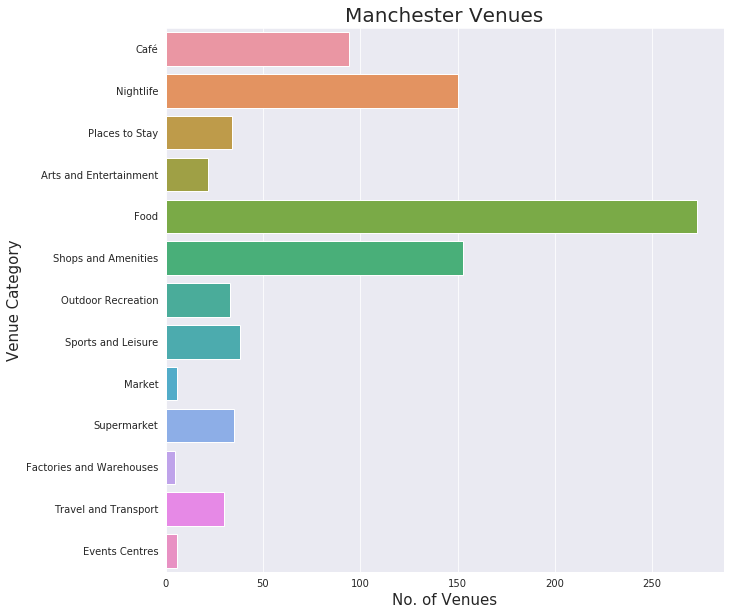

In [37]:
# Let's see how many venues of each category we have in total
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
c=sns.countplot(y='Venue Category', data=Manchester_venues)
c.axes.set_title("Manchester Venues",fontsize=20)
c.set_xlabel("No. of Venues",fontsize=15)
c.set_ylabel("Venue Category",fontsize=15)
c.tick_params(labelsize=10)

<p style="font-size:14pt; font-weight: bold;">3. Exploratory Data Analysis</p>

<p style="font-size:12pt;">3.1 Map of Manchester</p>

<p>Firstly, let's plot all of our postcodes on a map of Manchester.</p>

In [38]:
address = 'Manchester, UK'

geolocator = Nominatim(user_agent="manc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical co-ordinates of Manchester are {}, {}.'.format(latitude, longitude))

map_manc = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, postcode, suburb in zip(df_Manchester['latitude'], df_Manchester['longitude'], df_Manchester['Postcode'], df_Manchester['Suburb']):
    label = '{}, {}'.format(postcode, suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manc)  
    
map_manc

The geograpical co-ordinates of Manchester are 53.4794892, -2.2451148.


<p style="font-size:12pt;">3.1 Property Data</p>

<p>Let's explore the Property Data in df_Manchester

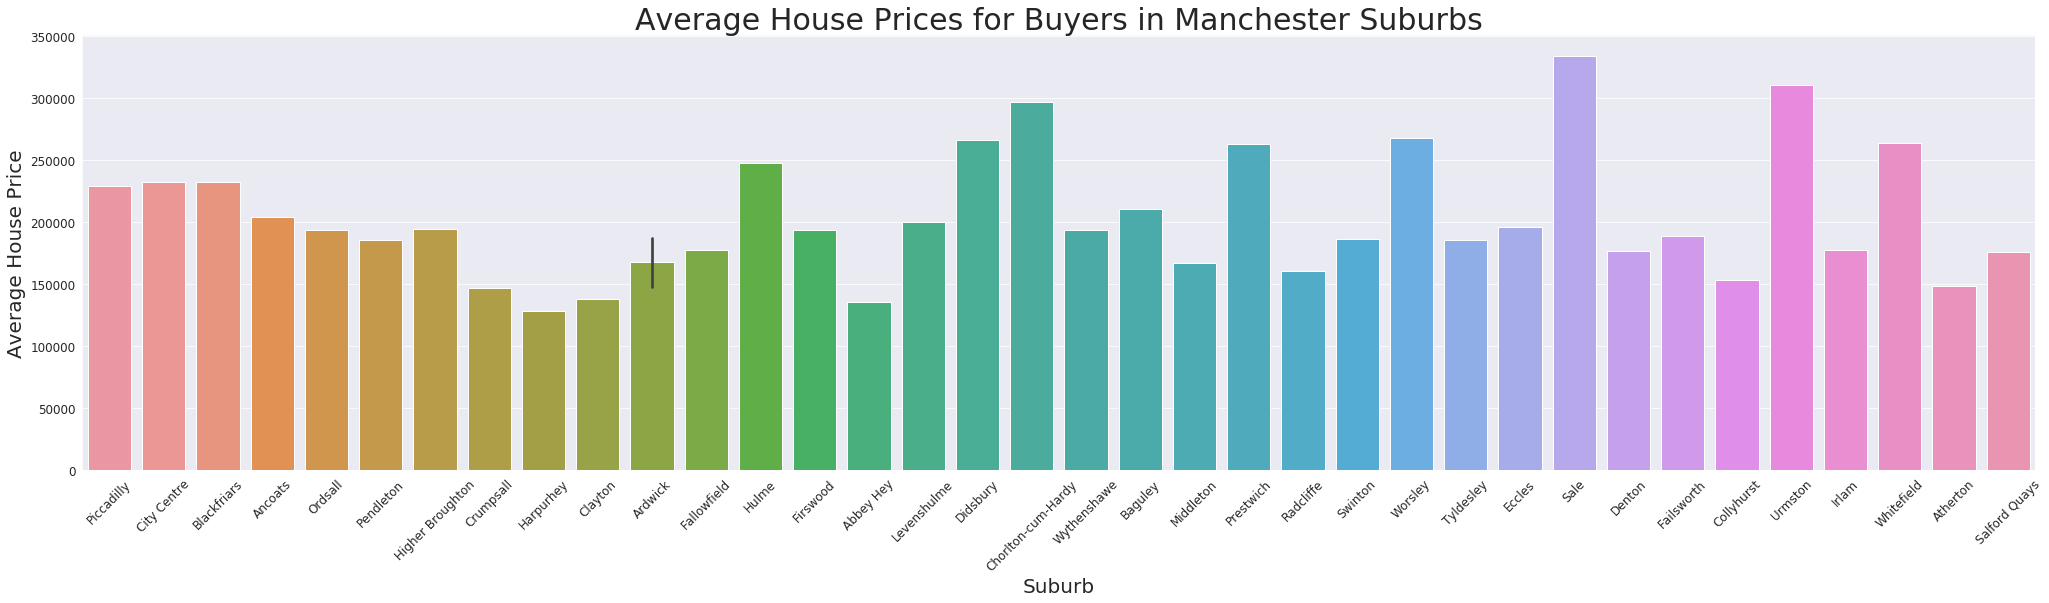

In [39]:
plt.figure(figsize=(35,8))
ax1 = sns.barplot(x='Suburb', y='Avg price', data=df_Manchester)
ax1.axes.set_title("Average House Prices for Buyers in Manchester Suburbs",fontsize=30)
ax1.set_xlabel("Suburb",fontsize=20)
ax1.set_ylabel("Average House Price",fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.tick_params(labelsize=12)

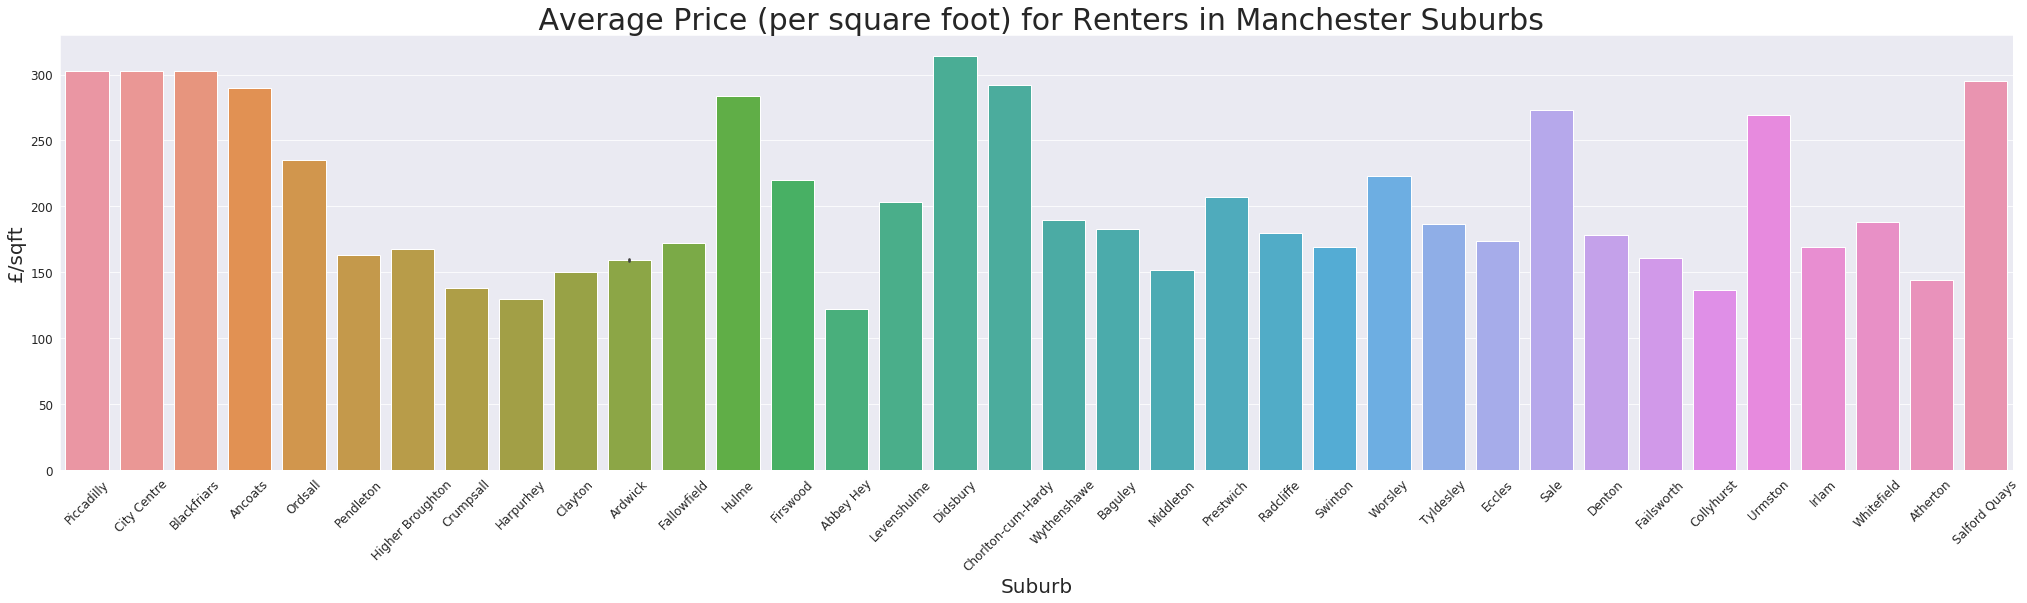

In [40]:
plt.figure(figsize=(35,8))
ax2 = sns.barplot(x='Suburb', y='£/sqft', data=df_Manchester)
ax2.axes.set_title(" Average Price (per square foot) for Renters in Manchester Suburbs",fontsize=30)
ax2.set_xlabel("Suburb",fontsize=20)
ax2.set_ylabel("£/sqft",fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.tick_params(labelsize=12)

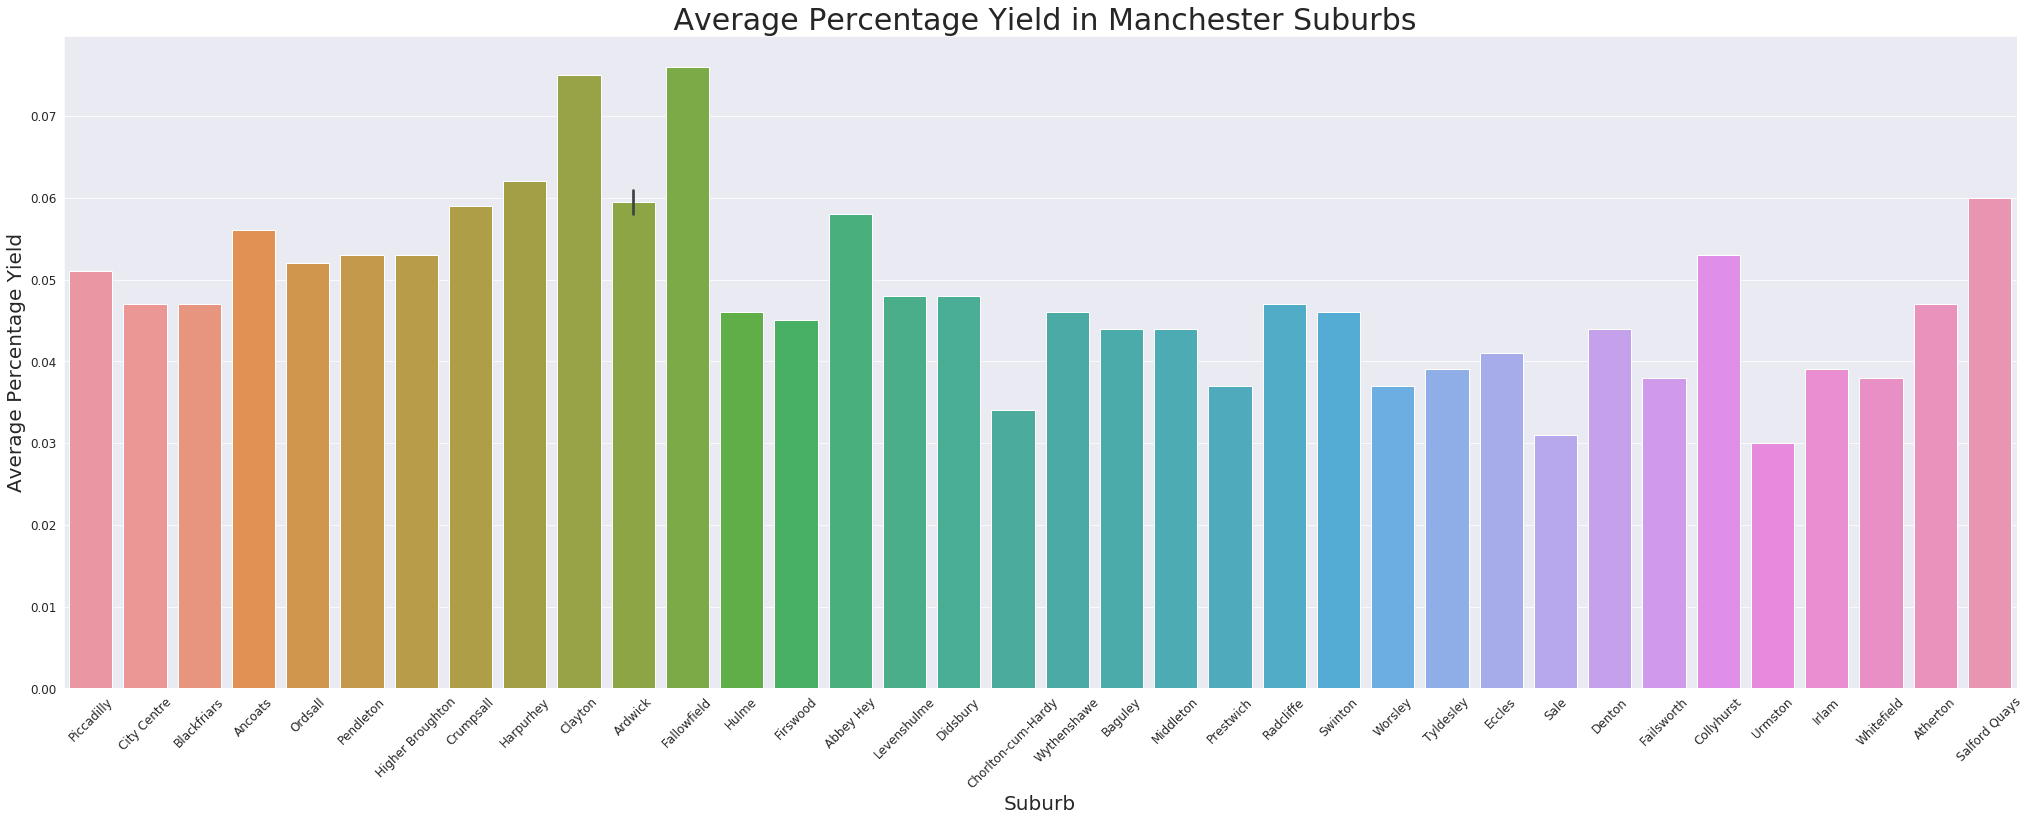

In [41]:
plt.figure(figsize=(35,12))
ax3 = sns.barplot(x='Suburb', y='Avg yield', data=df_Manchester)
ax3.axes.set_title(" Average Percentage Yield in Manchester Suburbs",fontsize=30)
ax3.set_xlabel("Suburb",fontsize=20)
ax3.set_ylabel("Average Percentage Yield",fontsize=20)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.tick_params(labelsize=12)

<p style="font-size:12pt;">3.2 Venue Data</p>

Let's first visualize the distribution of venues on the whole...

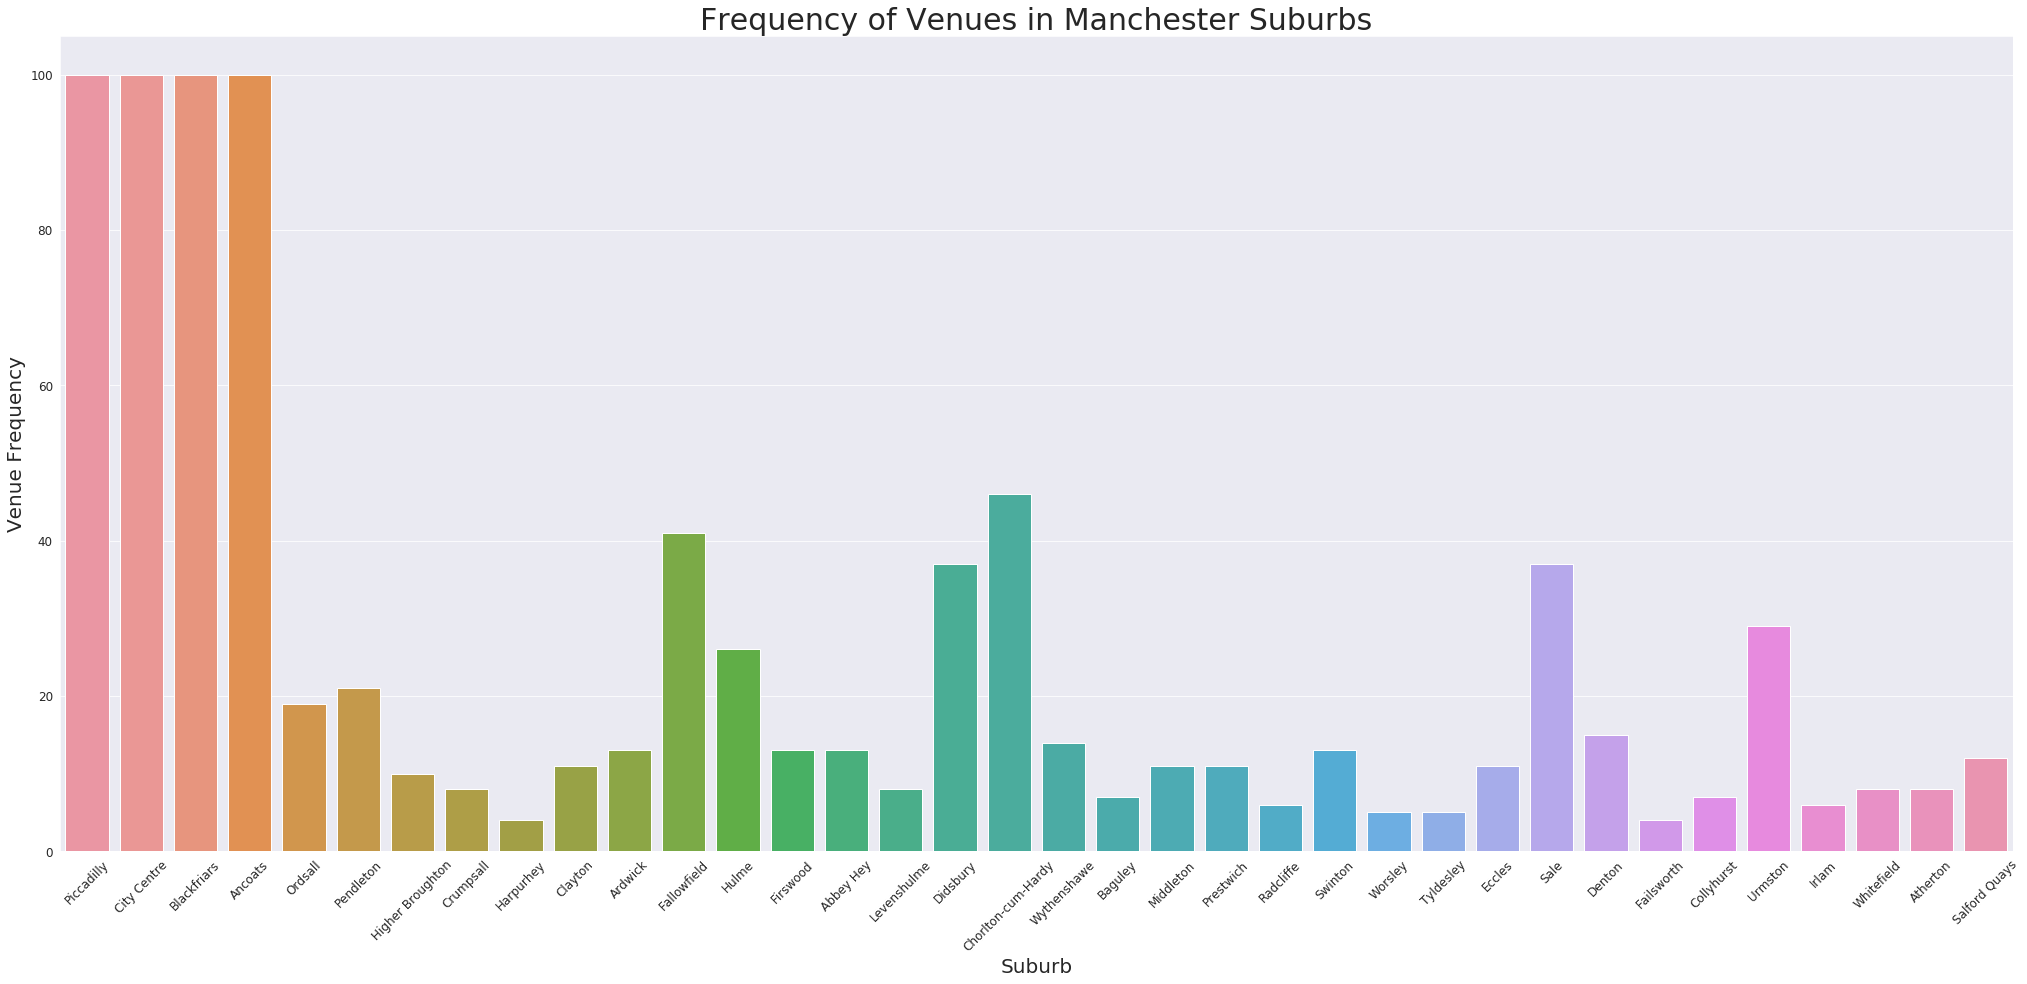

In [42]:
plt.figure(figsize=(35,15))
ax=sns.countplot(x='Suburb', data=Manchester_venues)
ax.axes.set_title("Frequency of Venues in Manchester Suburbs",fontsize=30)
ax.set_xlabel("Suburb",fontsize=20)
ax.set_ylabel("Venue Frequency",fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(labelsize=12)

<p style="font-size:12pt;">3.3 Venue Data & Property Data</p>

Now I'll prepare the data and merge property data with venue data so that we can see how the two impact each other

In [43]:
#In Manchester_onehot, each venue has it's own row with a '1' in the appropriate category column
Manchester_onehot = pd.get_dummies(Manchester_venues[['Venue Category']], prefix="", prefix_sep="")

Manchester_onehot['Suburb'] = Manchester_venues['Suburb'] 

fixed_columns = [Manchester_onehot.columns[-1]] + list(Manchester_onehot.columns[:-1])
Manchester_onehot = Manchester_onehot[fixed_columns]

Manchester_onehot.head()

,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport
0,Piccadilly,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Piccadilly,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Piccadilly,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Piccadilly,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Piccadilly,0,0,0,0,1,0,0,0,0,0,0,0,0


In [44]:
#In Manchester_sum, I have grouped the venues by suburb so that we can see how many venues theere are in each suburb in total, and how many venues there are of each category.
Manchester_sum = Manchester_onehot.groupby('Suburb').sum().reset_index()
Manchester_sum['Total'] = Manchester_sum.sum(axis=1)
Manchester_sum.head()

,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total
0,Abbey Hey,0,0,1,0,3,1,0,1,1,0,3,1,2,13
1,Ancoats,1,17,0,2,28,1,22,2,4,20,2,1,0,100
2,Ardwick,0,1,0,0,7,0,2,0,0,1,1,1,0,13
3,Atherton,0,0,0,0,1,0,1,0,0,2,3,1,0,8
4,Baguley,0,1,0,0,2,0,0,0,0,1,1,1,1,7


In [45]:
#df_mergedsum shows the representation of venues in each Manchester suburb but also contains property data. Let's explore whether the number of venues around a postcode impacts rent and house prices in the same area.
df_mergedsum=Manchester_sum.merge(df_Manchester,on='Suburb')
df_mergedsum

,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,...,Supermarket,Travel and Transport,Total,Postcode,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
0,Abbey Hey,0,0,1,0,3,1,0,1,1,...,1,2,13,M18,0.058,135557.0,122.0,0.15,53.461270,-2.168710
1,Ancoats,1,17,0,2,28,1,22,2,4,...,1,0,100,M4,0.056,204426.0,290.0,0.14,53.484550,-2.229090
2,Ardwick,0,1,0,0,7,0,2,0,0,...,1,0,13,M12,0.058,147898.0,160.0,0.16,53.464820,-2.201870
3,Ardwick,0,1,0,0,7,0,2,0,0,...,1,0,13,M13,0.061,187302.0,159.0,0.10,53.460300,-2.213890
4,Atherton,0,0,0,0,1,0,1,0,0,...,1,0,8,M46,0.047,148219.0,144.0,0.10,53.526010,-2.490310
5,Baguley,0,1,0,0,2,0,0,0,0,...,1,1,7,M23,0.044,210786.0,183.0,0.11,53.399020,-2.287290
6,Blackfriars,5,15,0,0,32,1,20,2,8,...,0,0,100,M3,0.047,232477.0,303.0,0.12,53.483610,-2.250180
7,Chorlton-cum-Hardy,0,5,0,0,20,0,12,2,0,...,0,1,46,M21,0.034,296667.0,292.0,0.11,53.437710,-2.270990
8,City Centre,5,15,0,0,32,1,20,2,8,...,0,0,100,M3,0.047,232477.0,303.0,0.12,53.483610,-2.250180
9,Clayton,0,0,0,0,3,1,0,1,0,...,1,1,11,M11,0.075,137805.0,150.0,0.13,53.478340,-2.179330


Text(0.5, 1.0, 'House Prices in Manchester Suburbs vs. No, of Venues')

<Figure size 432x288 with 0 Axes>

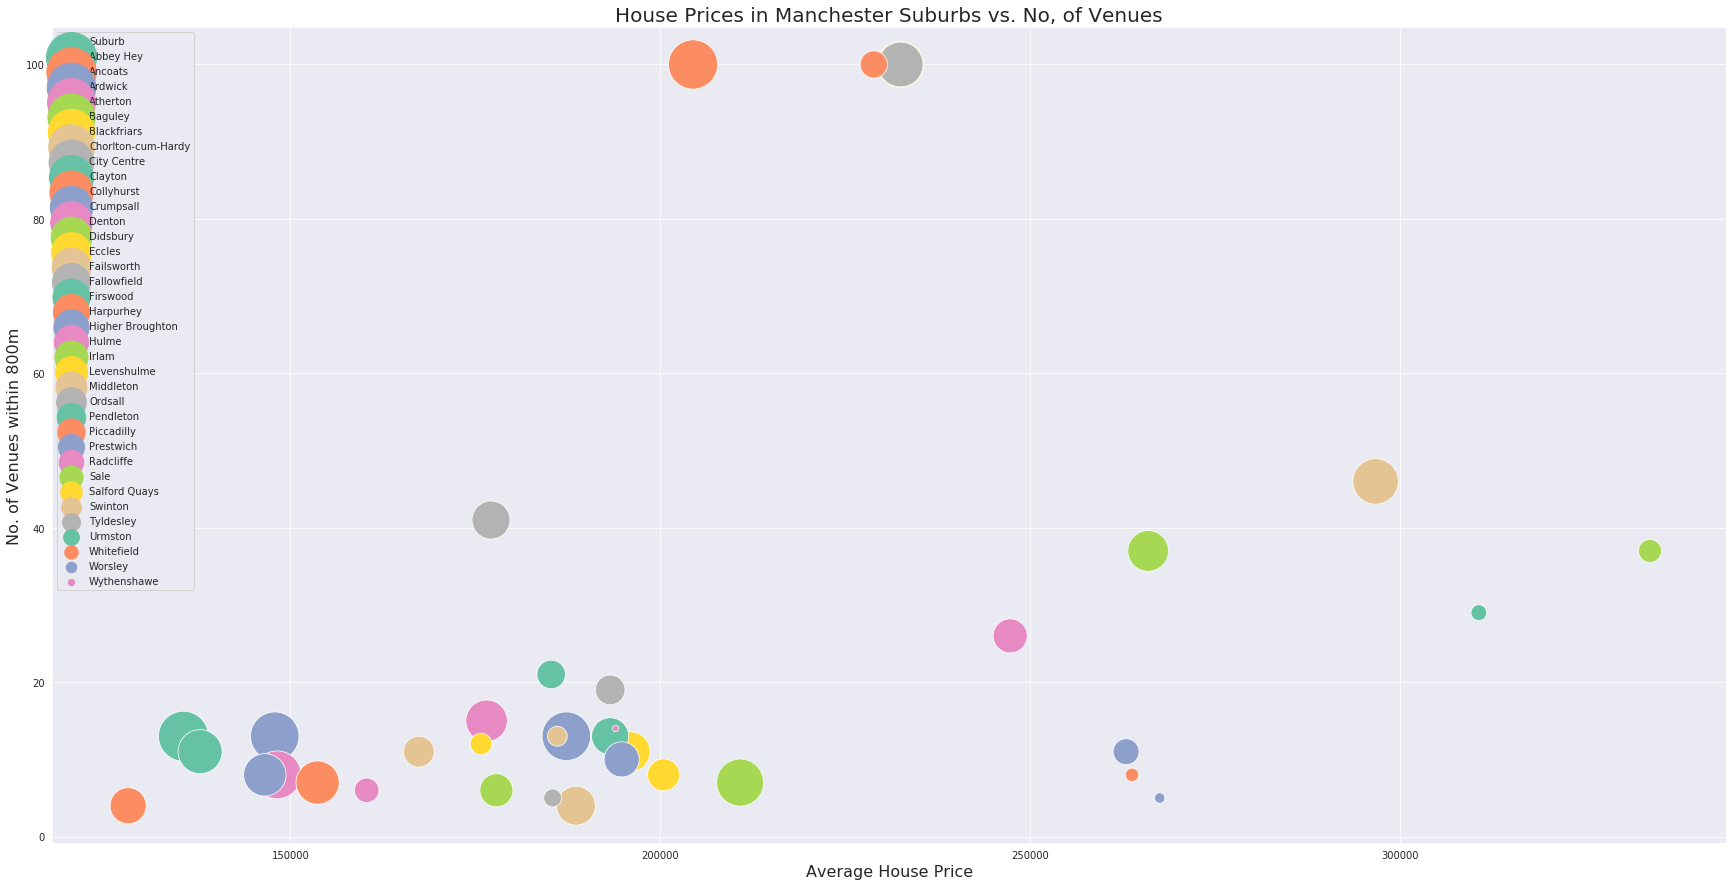

In [46]:
#House Prices in Manchester Suburbs vs. No, of Venues
fig=plt.gcf()

plt.figure(figsize=(30,15))
g = sns.scatterplot("Avg price", "Total", hue="Suburb", data=df_mergedsum, size="Suburb", sizes=(40, 2500), palette="Set2")
plt.xlabel('Average House Price', fontsize=16)
plt.ylabel('No. of Venues within 800m', fontsize=16)
plt.title('House Prices in Manchester Suburbs vs. No, of Venues', fontsize=20)

Now initially let's visualize the relationship between the number of venues <i>in total</i> in an area and the average house price, then the number of venues <i>in total</i> in an area and the average rent per square foot.

Text(0.5, 1.0, 'Rent in Manchester Suburbs vs. No, of Venues')

<Figure size 432x288 with 0 Axes>

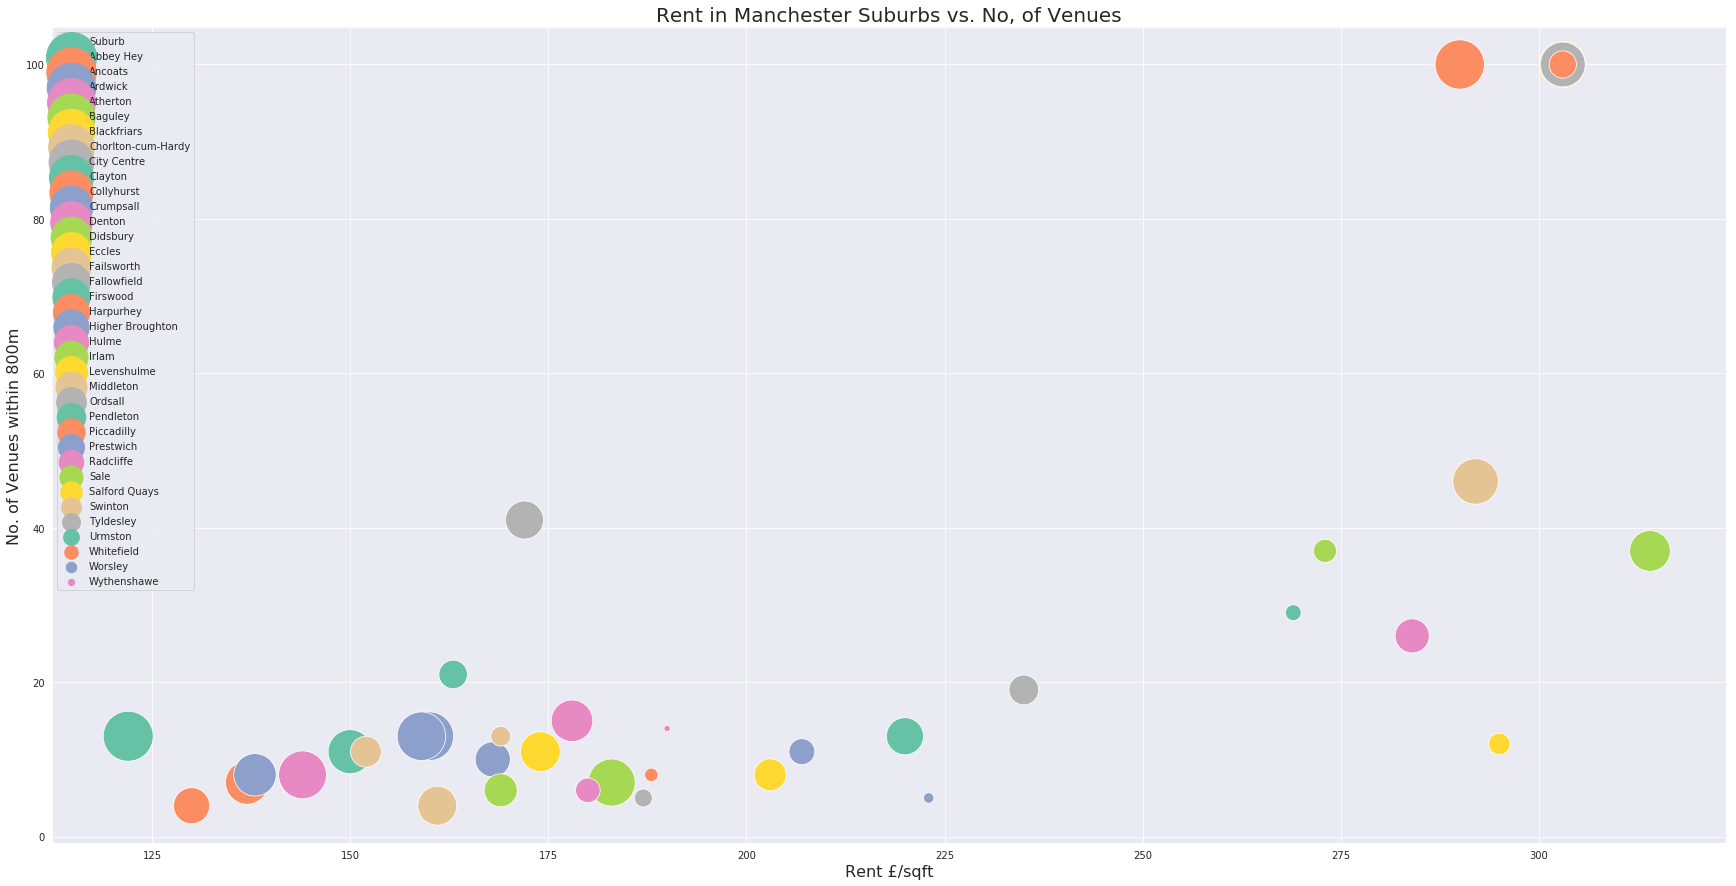

In [47]:
#Rent in Manchester Suburbs vs. No, of Venues
fig=plt.gcf()

plt.figure(figsize=(30,15))
g = sns.scatterplot("£/sqft", "Total", hue="Suburb", data=df_mergedsum, size="Suburb", sizes=(40, 2500), palette="Set2")
plt.xlabel('Rent £/sqft', fontsize=16)
plt.ylabel('No. of Venues within 800m', fontsize=16)
plt.title('Rent in Manchester Suburbs vs. No, of Venues', fontsize=20)

<p style="font-size:14pt; font-weight: bold;">4. Statistical Analysis</p>

<p style="font-size:12pt;">4.1 Normalizing the Data</p>

<p>We can definitely see a positive correlation between the number of venues in an area and the value of property in the scatter graphs above. I want to explore the possibility that the type of venues nearby also impacts the value of property in a Manchester suburb. Let's first normalize the data.</p>

In [48]:
#Now I want to normalize df_mergedsum, but will first drop unnecessary columns (Postcode, latitude and logitude) and set the 'Suburb' column as the index
df_mergedsum.drop(columns=['Postcode','latitude','longitude'], inplace=True)
df_mergedsum.set_index('Suburb', inplace=True)

In [49]:
#Now I can normalize the table and keep the column and index names using the following code...
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_mergedsum) 
df_mergedsum.loc[:,:] = scaled_values

df_mergedsum.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total,Avg yield,Avg price,£/sqft,5yr +/-
Suburb,,,,,,,,,,,,,,,,,,
Abbey Hey,0.0,0.000000,1.0,0.0,0.09375,1.0,0.000000,0.333333,0.125,0.00,1.000000,0.333333,0.5,0.093750,0.608696,0.036331,0.000000,0.750
Ancoats,0.2,1.000000,0.0,1.0,0.87500,1.0,0.785714,0.666667,0.500,1.00,0.666667,0.333333,0.0,1.000000,0.565217,0.371193,0.875000,0.625
Ardwick,0.0,0.058824,0.0,0.0,0.21875,0.0,0.071429,0.000000,0.000,0.05,0.333333,0.333333,0.0,0.093750,0.608696,0.096337,0.197917,0.875
Ardwick,0.0,0.058824,0.0,0.0,0.21875,0.0,0.071429,0.000000,0.000,0.05,0.333333,0.333333,0.0,0.093750,0.673913,0.287931,0.192708,0.125
Atherton,0.0,0.000000,0.0,0.0,0.03125,0.0,0.035714,0.000000,0.000,0.10,1.000000,0.333333,0.0,0.041667,0.369565,0.097898,0.114583,0.125


<p style="font-size:12pt;">4.2 Understanding the relationship between variables</p>


In [50]:
#Let's use corr() to understand the data and the relationship between variables
df_mergedsum.corr()

,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total,Avg yield,Avg price,£/sqft,5yr +/-
Arts and Entertainment,1.000000,0.784708,-0.144370,0.044876,0.816610,0.417912,0.794337,0.310174,0.924086,0.741350,0.132661,-0.325406,-0.276782,0.837384,0.118411,0.180656,0.537342,-0.000832
Café,0.784708,1.000000,-0.157757,0.327974,0.912446,0.597027,0.916268,0.396084,0.865394,0.900094,0.190956,-0.278291,-0.228293,0.962005,-0.018317,0.333726,0.679089,-0.001489
Events Centres,-0.144370,-0.157757,1.000000,-0.125340,-0.235177,0.005376,-0.153249,-0.192865,-0.119922,-0.156894,0.115470,0.099804,-0.057076,-0.174630,-0.240574,0.051195,-0.116674,-0.056911
Factories and Warehouses,0.044876,0.327974,-0.125340,1.000000,0.211349,0.183832,0.231370,0.289418,0.143372,0.413219,0.146177,-0.057718,-0.156625,0.289793,0.038776,0.096402,0.332266,0.057189
Food,0.816610,0.912446,-0.235177,0.211349,1.000000,0.476415,0.948895,0.434602,0.817111,0.820358,0.272934,-0.325340,-0.148897,0.970677,0.078625,0.387198,0.718157,-0.009157
Market,0.417912,0.597027,0.005376,0.183832,0.476415,1.000000,0.453526,0.463320,0.528577,0.457929,0.184380,-0.071952,-0.057076,0.537845,0.159560,0.056261,0.257734,0.124616
Nightlife,0.794337,0.916268,-0.153249,0.231370,0.948895,0.453526,1.000000,0.377155,0.856800,0.846966,0.223905,-0.369855,-0.202143,0.967637,-0.002774,0.365303,0.704765,-0.098099
Outdoor Recreation,0.310174,0.396084,-0.192865,0.289418,0.434602,0.463320,0.377155,1.000000,0.305053,0.357562,0.119798,0.102402,-0.156649,0.442190,-0.082455,0.392043,0.397440,0.140394
Places to Stay,0.924086,0.865394,-0.119922,0.143372,0.817111,0.528577,0.856800,0.305053,1.000000,0.830405,0.108329,-0.354832,-0.221567,0.887317,0.068818,0.162908,0.597493,-0.013805
Shops and Amenities,0.741350,0.900094,-0.156894,0.413219,0.820358,0.457929,0.846966,0.357562,0.830405,1.000000,0.196516,-0.147143,-0.241275,0.914255,0.047798,0.235578,0.617486,0.089853


<p>I can see strong positive correlation between total number of venues in an area and rent per square foot. There is also a correlation between total number of venues in an area and average house price. Let's visualize this correlation to better unedrstand it.

In [51]:
print(df_mergedsum['Total'].corr(df_mergedsum['£/sqft']))
print(df_mergedsum['Total'].corr(df_mergedsum['Avg price']))
print(df_mergedsum['Total'].corr(df_mergedsum['Avg yield']))
print(df_mergedsum['Total'].corr(df_mergedsum['5yr +/-']))

0.7130689263931919
0.35124880428412925
0.039398128142668694
0.0064176111431613145


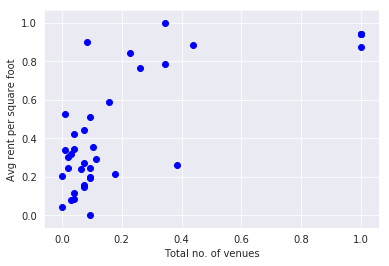

In [52]:
plt.scatter(df_mergedsum.Total, df_mergedsum['£/sqft'],  color='blue')
plt.xlabel("Total no. of venues")
plt.ylabel("Avg rent per square foot")
plt.show()

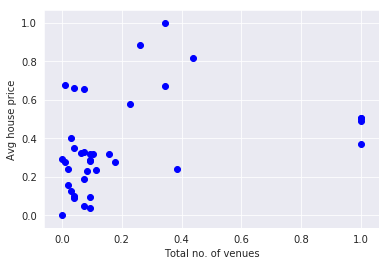

In [53]:
plt.scatter(df_mergedsum.Total, df_mergedsum['Avg price'],  color='blue')
plt.xlabel("Total no. of venues")
plt.ylabel("Avg house price")
plt.show()

As expected, there is also a strong positive correlation between the number of cafes, bars, eateries and nightlife in an area and the price of buying property, but there seems to be a much stronger correlation between the number of venues that appear to young professionals and the price of rent. Let's explore this further.

In [54]:
print(df_mergedsum['Café'].corr(df_mergedsum['£/sqft']))
print(df_mergedsum['Café'].corr(df_mergedsum['Avg price']))

0.6790887317450962
0.33372560745311447


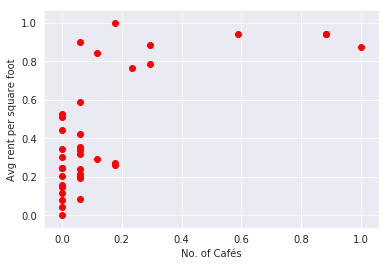

In [55]:
plt.scatter(df_mergedsum.Café, df_mergedsum['£/sqft'],  color='red')
plt.xlabel("No. of Cafés")
plt.ylabel("Avg rent per square foot")
plt.show()

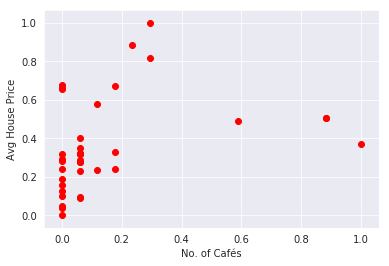

In [56]:
plt.scatter(df_mergedsum.Café, df_mergedsum['Avg price'],  color='red')
plt.xlabel("No. of Cafés")
plt.ylabel("Avg House Price")
plt.show()

In [57]:
print(df_mergedsum['Nightlife'].corr(df_mergedsum['£/sqft']))
print(df_mergedsum['Nightlife'].corr(df_mergedsum['Avg price']))

0.7047652136106043
0.365302741753993


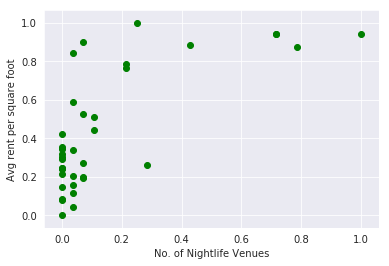

In [58]:
plt.scatter(df_mergedsum.Nightlife, df_mergedsum['£/sqft'],  color='green')
plt.xlabel("No. of Nightlife Venues")
plt.ylabel("Avg rent per square foot")
plt.show()

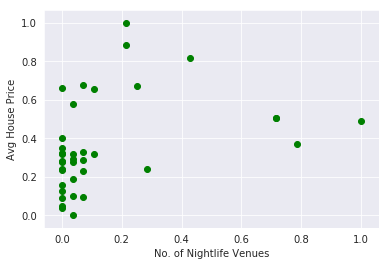

In [59]:
plt.scatter(df_mergedsum.Nightlife, df_mergedsum['Avg price'],  color='green')
plt.xlabel("No. of Nightlife Venues")
plt.ylabel("Avg House Price")
plt.show()

In [60]:
print(df_mergedsum['Food'].corr(df_mergedsum['£/sqft']))
print(df_mergedsum['Food'].corr(df_mergedsum['Avg price']))

0.7181570602421117
0.38719772032088995


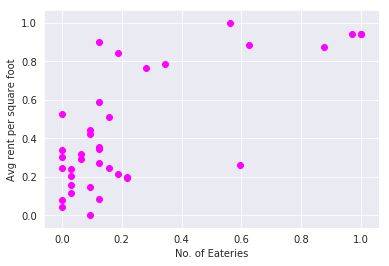

In [61]:
plt.scatter(df_mergedsum.Food, df_mergedsum['£/sqft'],  color='magenta')
plt.xlabel("No. of Eateries")
plt.ylabel("Avg rent per square foot")
plt.show()

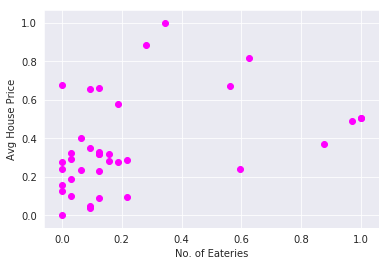

In [62]:
plt.scatter(df_mergedsum.Food, df_mergedsum['Avg price'],  color='magenta')
plt.xlabel("No. of Eateries")
plt.ylabel("Avg House Price")
plt.show()

In [63]:
print(df_mergedsum['Shops and Amenities'].corr(df_mergedsum['£/sqft']))
print(df_mergedsum['Shops and Amenities'].corr(df_mergedsum['Avg price']))

0.6174860879310313
0.2355781340542433


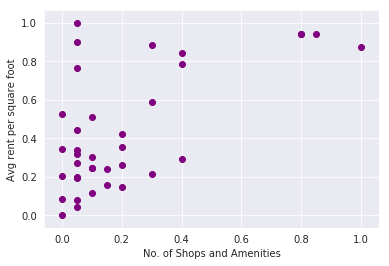

In [64]:
plt.scatter(df_mergedsum['Shops and Amenities'], df_mergedsum['£/sqft'],  color='purple')
plt.xlabel("No. of Shops and Amenities")
plt.ylabel("Avg rent per square foot")
plt.show()

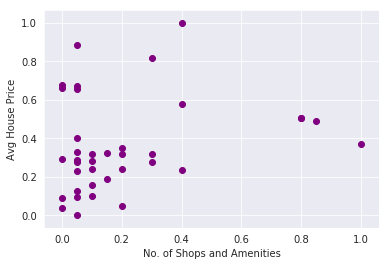

In [65]:
plt.scatter(df_mergedsum['Shops and Amenities'], df_mergedsum['Avg price'],  color='purple')
plt.xlabel("No. of Shops and Amenities")
plt.ylabel("Avg House Price")
plt.show()

<p style="font-size:12pt;">4.3 Clustering Manchester's Suburbs Based on Venue</p>

<p>Now that we have seen there is a correlation between the number of bars, cafes, shops, nightlife and eateries and the value of houses as well as the price of rent, I am going to cluster the Manchester suburbs based on venue. Clusters with large numbers of bars/clubs/nightlife/eateriees will be worth investing in if rent is high and house prices are likely to rise. These areas could be expected to see an increase in property value soon.</p>

In [66]:
#I don't want to use the property data to cluster the suburbs, only the make-up of the venues in those areas, so let's drop the columns we don't want to use
df_cluster=df_mergedsum.drop(columns=['Avg yield', 'Avg price', '£/sqft', '5yr +/-'])

In [67]:
from sklearn.cluster import KMeans

kclusters=6

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)

kmeans.labels_[0:10]

array([4, 2, 1, 1, 1, 1, 2, 1, 2, 4], dtype=int32)

In [68]:
df_cluster.reset_index(inplace=True)

In [69]:
df_cluster.insert(0, 'Cluster Labels', kmeans.labels_)
df_cluster.head()

,Cluster Labels,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total
0,4,Abbey Hey,0.0,0.000000,1.0,0.0,0.09375,1.0,0.000000,0.333333,0.125,0.00,1.000000,0.333333,0.5,0.093750
1,2,Ancoats,0.2,1.000000,0.0,1.0,0.87500,1.0,0.785714,0.666667,0.500,1.00,0.666667,0.333333,0.0,1.000000
2,1,Ardwick,0.0,0.058824,0.0,0.0,0.21875,0.0,0.071429,0.000000,0.000,0.05,0.333333,0.333333,0.0,0.093750
3,1,Ardwick,0.0,0.058824,0.0,0.0,0.21875,0.0,0.071429,0.000000,0.000,0.05,0.333333,0.333333,0.0,0.093750
4,1,Atherton,0.0,0.000000,0.0,0.0,0.03125,0.0,0.035714,0.000000,0.000,0.10,1.000000,0.333333,0.0,0.041667


In [70]:
df_cluster.drop_duplicates(inplace=True)

In [71]:
#Now that I have my clusters, I want to retrieve the geographical co-ordinates of each suburb so that I can plot the clusters on the map. I also want to see my property data so that we can gather insights from the clusters
Manc_cluster=df_cluster.merge(df_Manchester,on='Suburb')

In [72]:
Manc_cluster.head()

,Cluster Labels,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,...,Supermarket,Travel and Transport,Total,Postcode,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
0,4,Abbey Hey,0.0,0.000000,1.0,0.0,0.09375,1.0,0.000000,0.333333,...,0.333333,0.5,0.093750,M18,0.058,135557.0,122.0,0.15,53.46127,-2.16871
1,2,Ancoats,0.2,1.000000,0.0,1.0,0.87500,1.0,0.785714,0.666667,...,0.333333,0.0,1.000000,M4,0.056,204426.0,290.0,0.14,53.48455,-2.22909
2,1,Ardwick,0.0,0.058824,0.0,0.0,0.21875,0.0,0.071429,0.000000,...,0.333333,0.0,0.093750,M12,0.058,147898.0,160.0,0.16,53.46482,-2.20187
3,1,Ardwick,0.0,0.058824,0.0,0.0,0.21875,0.0,0.071429,0.000000,...,0.333333,0.0,0.093750,M13,0.061,187302.0,159.0,0.10,53.46030,-2.21389
4,1,Atherton,0.0,0.000000,0.0,0.0,0.03125,0.0,0.035714,0.000000,...,0.333333,0.0,0.041667,M46,0.047,148219.0,144.0,0.10,53.52601,-2.49031


In [73]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Manc_cluster['latitude'], Manc_cluster['longitude'], Manc_cluster['Suburb'], Manc_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

<p style="font-size:14pt; font-weight: bold;">5. Results</p>

<p style="font-size:12pt;">5.1 Reviewing the clusters</p>

<p>Now that all of our suburbs have been assigned clusters, let's review the identifying features of each cluster.</p>

The red clusters represent cluster 0, which is made up of suburbs without many venues or transport links nearby, but all suburbs in this cluster have an events centre within 800m.

In [317]:
pd.set_option('display.max_columns', None)
Manc_cluster.loc[Manc_cluster['Cluster Labels'] == 0, Manc_cluster.columns[[1] + list(range(0, Manc_cluster.shape[1]))]]

,Suburb,Cluster Labels,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total,Postcode,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
23,Middleton,0,Middleton,0.0,0.000000,1.0,0.0,0.03125,0.0,0.035714,0.000000,0.000000,0.15,0.333333,0.666667,0.00,0.052083,M24,0.044,167368.0,152.0,0.13,53.55113,-2.19624
28,Radcliffe,0,Radcliffe,0.0,0.000000,1.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.15,0.000000,0.666667,0.25,0.031250,M26,0.047,160319.0,180.0,0.11,53.56161,-2.33369
29,Sale,0,Sale,0.2,0.294118,1.0,0.0,0.40625,0.0,0.214286,0.000000,0.142857,0.55,0.666667,1.000000,0.25,0.416667,M33,0.031,333749.0,273.0,0.13,53.42050,-2.32506
32,Tyldesley,0,Tyldesley,0.0,0.058824,1.0,0.0,0.00000,0.0,0.035714,0.000000,0.000000,0.05,0.000000,0.000000,0.00,0.000000,M29,0.039,185453.0,187.0,0.11,53.50816,-2.45692
35,Worsley,0,Worsley,0.0,0.000000,1.0,0.0,0.00000,0.0,0.071429,0.666667,0.000000,0.00,0.000000,0.000000,0.00,0.010417,M28,0.037,267490.0,223.0,0.11,53.51467,-2.39666


The purple clusters represent cluster 1, which is made up of suburbs which I would consider less desirable for young professionals, with a low number of venues nearby. Some have good transport links or decent access to supermarkets.

In [318]:
pd.set_option('display.max_columns', None)
Manc_cluster.loc[Manc_cluster['Cluster Labels'] == 1, Manc_cluster.columns[[1] + list(range(0, Manc_cluster.shape[1]))]]

,Suburb,Cluster Labels,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total,Postcode,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
4,Atherton,1,Atherton,0.0,0.000000,0.0,0.0,0.03125,0.0,0.035714,0.000000,0.000000,0.15,1.000000,0.666667,0.00,0.062500,M46,0.047,148219.0,144.0,0.10,53.526010,-2.490310
5,Baguley,1,Baguley,0.0,0.058824,0.0,0.0,0.06250,0.0,0.000000,0.000000,0.000000,0.05,0.333333,0.333333,0.50,0.041667,M23,0.044,210786.0,183.0,0.11,53.399020,-2.287290
10,Collyhurst,1,Collyhurst,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.00,0.333333,0.666667,0.25,0.000000,M40,0.053,153687.0,137.0,0.14,53.503490,-2.189990
12,Denton,1,Denton,0.0,0.117647,0.0,0.0,0.06250,0.0,0.000000,0.000000,0.000000,0.35,0.000000,0.666667,0.00,0.093750,M34,0.044,176526.0,178.0,0.11,53.455940,-2.117480
14,Eccles,1,Eccles,0.0,0.176471,0.0,0.0,0.09375,0.0,0.071429,0.000000,0.000000,0.10,0.333333,0.000000,0.00,0.072917,M30,0.041,195930.0,174.0,0.11,53.484240,-2.354180
15,Failsworth,1,Failsworth,0.2,0.000000,0.0,0.0,0.03125,0.0,0.035714,0.000000,0.000000,0.05,0.333333,0.666667,0.00,0.031250,M35,0.038,188603.0,161.0,0.11,53.507140,-2.152300
17,Firswood,1,Firswood,0.2,0.000000,0.0,0.5,0.12500,0.0,0.107143,0.000000,0.000000,0.10,0.000000,0.000000,0.50,0.093750,M16,0.045,193221.0,220.0,0.09,53.454810,-2.263570
18,Harpurhey,1,Harpurhey,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.333333,0.000000,0.10,0.000000,0.000000,0.25,0.000000,M9,0.062,128085.0,130.0,0.12,53.521430,-2.212690
19,Higher Broughton,1,Higher Broughton,0.0,0.058824,0.0,0.0,0.06250,0.0,0.000000,0.333333,0.000000,0.05,0.666667,0.333333,0.25,0.052083,M7,0.053,194781.0,168.0,0.10,53.505160,-2.260860
21,Irlam,1,Irlam,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.333333,0.000000,0.05,0.333333,0.666667,0.00,0.010417,M44,0.039,177845.0,169.0,0.12,53.440860,-2.426090


The darker blue clusters represent cluster 2, which is made up of central suburbs with a high frequency of venues including food, nightlife, places to stay, shop and amenities nearby.

In [319]:
Manc_cluster.loc[Manc_cluster['Cluster Labels'] == 2, Manc_cluster.columns[[1] + list(range(0, Manc_cluster.shape[1]))]]

,Suburb,Cluster Labels,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total,Postcode,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
6,Blackfriars,2,Blackfriars,1.0,0.882353,0.0,0.0,1.00000,1.0,0.714286,0.666667,1.0,0.85,0.333333,0.0,0.0,1.0,M3,0.047,232477.0,303.0,0.12,53.48361,-2.25018
8,City Centre,2,City Centre,1.0,0.882353,0.0,0.0,1.00000,1.0,0.714286,0.666667,1.0,0.85,0.333333,0.0,0.0,1.0,M3,0.047,232477.0,303.0,0.12,53.48361,-2.25018
26,Piccadilly,2,Piccadilly,0.8,0.588235,0.0,0.0,0.96875,0.0,1.000000,0.333333,1.0,0.85,0.666667,0.0,0.0,1.0,M1,0.051,228854.0,303.0,0.12,53.47734,-2.23508


The light blue/cyan clusters represent cluster 3, which is made up of suburbs which are not central but do have a high number of venues mostly made up of food joints, cafes, some have decent nightlife as well as outdoor recreation facilities. I would say this cateogry contains the most desirable areas for young professionals!

In [320]:
Manc_cluster.loc[Manc_cluster['Cluster Labels'] == 3, Manc_cluster.columns[[1] + list(range(0, Manc_cluster.shape[1]))]]

,Suburb,Cluster Labels,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total,Postcode,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
2,Ardwick,3,Ardwick,0.0,0.058824,0.0,0.5,0.25000,0.0,0.071429,0.333333,0.000000,0.10,0.333333,0.333333,0.25,0.145833,M12,0.058,147898.0,160.0,0.16,53.46482,-2.20187
3,Ardwick,3,Ardwick,0.0,0.058824,0.0,0.5,0.25000,0.0,0.071429,0.333333,0.000000,0.10,0.333333,0.333333,0.25,0.145833,M13,0.061,187302.0,159.0,0.10,53.46030,-2.21389
7,Chorlton-cum-Hardy,3,Chorlton-cum-Hardy,0.0,0.294118,0.0,0.0,0.62500,0.0,0.464286,0.666667,0.000000,0.30,0.000000,0.000000,0.50,0.458333,M21,0.034,296667.0,292.0,0.11,53.43771,-2.27099
11,Crumpsall,3,Crumpsall,0.2,0.058824,0.0,0.0,0.15625,0.0,0.000000,0.666667,0.000000,0.05,0.000000,0.333333,0.25,0.083333,M8,0.059,146557.0,138.0,0.17,53.50880,-2.23827
13,Didsbury,3,Didsbury,0.0,0.176471,0.0,0.0,0.56250,0.0,0.250000,0.333333,0.000000,0.05,1.000000,0.333333,0.50,0.333333,M20,0.048,265929.0,314.0,0.11,53.42521,-2.23027
16,Fallowfield,3,Fallowfield,0.4,0.235294,0.0,0.0,0.59375,0.0,0.285714,0.333333,0.000000,0.15,1.000000,0.000000,0.50,0.395833,M14,0.076,177123.0,172.0,0.13,53.44770,-2.22437
20,Hulme,3,Hulme,0.2,0.176471,0.0,1.0,0.18750,0.0,0.035714,0.666667,0.142857,0.35,0.666667,0.333333,0.00,0.229167,M15,0.046,247285.0,284.0,0.14,53.46563,-2.25008
25,Pendleton,3,Pendleton,0.0,0.058824,0.0,0.0,0.18750,0.0,0.000000,1.000000,0.000000,0.35,0.333333,1.000000,0.00,0.177083,M6,0.053,185257.0,163.0,0.16,53.49159,-2.29696
34,Whitefield,3,Whitefield,0.0,0.000000,0.0,0.0,0.15625,0.0,0.000000,0.666667,0.000000,0.00,0.333333,0.666667,0.25,0.072917,M45,0.038,263750.0,188.0,0.12,53.54734,-2.28829


The lime green clusters represent cluster 4, which consists of areas of Manchester with a low number of venues, but some eateries, supermarkets and decent transport links.

In [321]:
Manc_cluster.loc[Manc_cluster['Cluster Labels'] == 4, Manc_cluster.columns[[1] + list(range(0, Manc_cluster.shape[1]))]]

,Suburb,Cluster Labels,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total,Postcode,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
0,Abbey Hey,4,Abbey Hey,0.0,0.000000,1.0,0.0,0.09375,1.0,0.000000,0.333333,0.142857,0.00,1.000000,0.333333,0.50,0.093750,M18,0.058,135557.0,122.0,0.15,53.46127,-2.16871
9,Clayton,4,Clayton,0.0,0.000000,0.0,0.0,0.09375,1.0,0.000000,0.333333,0.000000,0.20,0.000000,0.333333,0.25,0.072917,M11,0.075,137805.0,150.0,0.13,53.47834,-2.17933
33,Urmston,4,Urmston,0.0,0.352941,0.0,0.0,0.21875,1.0,0.214286,1.000000,0.000000,0.05,0.666667,0.666667,0.25,0.260417,M41,0.030,310619.0,269.0,0.13,53.45095,-2.36294


The orange clusters represent cluster 5, which consists of one area of Manchester which has a very high number of venues, but not as many places to stay as the more central parts of Manchester so it is slightly more residential than the other central areas marked by blue dots, and also some buildings such as factories and warehouses which are not present in the very centre.

In [322]:
Manc_cluster.loc[Manc_cluster['Cluster Labels'] == 5, Manc_cluster.columns[[1] + list(range(0, Manc_cluster.shape[1]))]]

,Suburb,Cluster Labels,Suburb,Arts and Entertainment,Café,Events Centres,Factories and Warehouses,Food,Market,Nightlife,Outdoor Recreation,Places to Stay,Shops and Amenities,Sports and Leisure,Supermarket,Travel and Transport,Total,Postcode,Avg yield,Avg price,£/sqft,5yr +/-,latitude,longitude
1,Ancoats,5,Ancoats,0.2,1.0,0.0,1.0,0.875,1.0,0.821429,0.666667,0.428571,1.0,0.666667,0.333333,0.0,1.0,M4,0.056,204426.0,290.0,0.14,53.48455,-2.22909
